# Hyperparameter Tuning & ML Pipelines

This is the notebook underlying the reveal.js slides that were used for <a href="https://www.meetup.com/Richmond-Data-Science-Community-Meetup/events/250460220/">Richmond Data Science community meetup on May 30th, 2018.</a>

## About me:

I am Atul Saurav (@twtAtul), 
- Lead Genworth Financials' Data Engineering Team
- MS in Decison Analytics, VCU DAPT class of 2019
- Passionate about learning, data and everything around it

You can also find me on LinkedIn

## What is this talk about?

- Building Machine Learning Models
- Python specific
- scikit-learn based models

## What is this talk not about?

- Data Cleansing
- Feature Engineering
- Deep Learning 
- Other exciting stuff that is difficult to cover in 1 meetup!


># All models are wrong but some are useful

 
<cite class="data-cite">Box, G. E. P. (1979), "Robustness in the strategy of scientific model building", in Launer, R. L.; Wilkinson, G. N., Robustness in Statistics, Academic Press, pp. 201–236.</cite>


## Reality is complex - 

<ul>
    <li><p class="fragment fade-left">too many factors influence outcome</p></li>
    <li><p class="fragment fade-left">factors difficult to measure accurately and objectively</p></li>
    <li><p class="fragment fade-left">not all factors may be known</p></li>
</ul>

> ## How do we build <span class="fragment highlight-green">useful</span> models?
> ## How do we <span class="fragment highlight-green">minimize</span> our <span class="fragment highlight-red">effort</span> in model building?

## Approach
- Use toy datasets for illustration and visualization
- Use real dataset for demonstrating application efficacy

## Scikit-learn API Overview

- All methods are implemented as estimators
- All estimators have a ```.fit()``` method
- All supervised estimators have ```.predict()``` method
- All unsupervised estimators have ```.transform()``` method

<table>
<tr style="border:None; font-size:20px; padding:10px;"><th>``model.predict``</th><th>``model.transform``</th></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Classification</td><td>Preprocessing</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Regression</td><td>Dimensionality Reduction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Clustering</td><td>Feature Extraction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>&nbsp;</td><td>Feature Selection</td></tr>

</table>


### Usual High Level Flow

In [ ]:
from sklearn.family import SomeModel
myModel = SomeModel()
myModel.fit(X_train,y_train)

# supervised
myModel.predict(X_test)
myModel.score(X_test, y_test)

## unsupervised
myModel.transform(X_train)

## Problem Statement

- Classify data into 2 groups based on already observed groupings
- Using house price data, predict if the price of the given house will be >= 500K

> ### Binary Classification Problem

### Toy Example

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn-talk')
_ = plt.xkcd()

In [2]:
from sklearn.datasets import make_blobs

scaled_X, scaled_y = make_blobs(centers=2, random_state=0)
scaled_X[:,0] = 10* scaled_X[:,0] + 3
X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)


### Visualize Data

Text(0.5,0,'first feature')

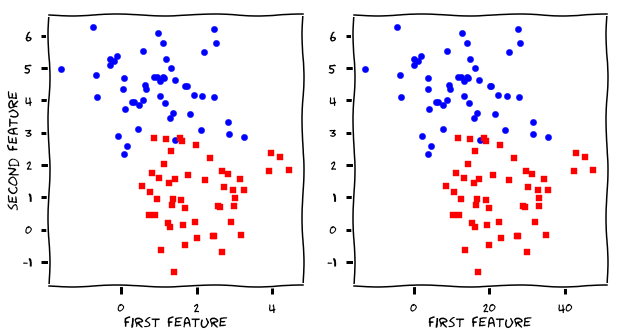

In [3]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax0.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
ax0.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')
ax0.set_xlabel('first feature')
ax0.set_ylabel('second feature')

ax1.scatter(scaled_X[scaled_y == 0, 0], scaled_X[scaled_y == 0, 1], c='blue', s=40, label='0')
ax1.scatter(scaled_X[scaled_y == 1, 0], scaled_X[scaled_y == 1, 1], c='red', s=40, label='1', marker='s')
ax1.set_xlabel('first feature')

### Create Training and Test Set

**Training Set** - Data used to train the model
 
**Test Set** - Data held out in the very beginning for testing model performance. This data should not be touched until final scoring

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)
scaled_X_train, scaled_X_test, \
scaled_y_train, scaled_y_test = train_test_split(scaled_X, 
                                                    scaled_y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

In [5]:
X_train.shape

(75, 2)

In [6]:
y_train.shape

(75,)

### Train a Nearest Neighbor Classifier - 1 Neighbor

Overfit!!

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
scaled_knn = KNeighborsClassifier(n_neighbors=1)
scaled_knn.fit(scaled_X_train, scaled_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Comapre Model Performance

In [9]:
knn.score(X_test, y_test)

1.0

In [10]:
scaled_knn.score(scaled_X_test, scaled_y_test)

0.95999999999999996

### Visualize Model - regular

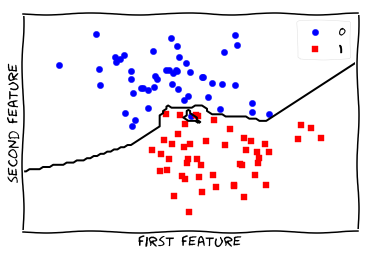

In [11]:
from figures import plot_2d_separator
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
_ = plt.legend()

### Visualize Model - scaled

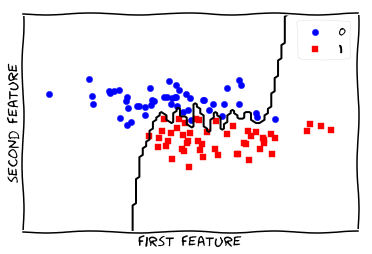

In [12]:
from figures import plot_2d_separator
plt.scatter(scaled_X[scaled_y == 0, 0], scaled_X[scaled_y == 0, 1], c='blue', s=40, label='0')
plt.scatter(scaled_X[scaled_y == 1, 0], scaled_X[scaled_y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(scaled_knn, scaled_X)
_ = plt.legend()

### Revelation 

> ### Scale of various features matters!

### Train Nearest Neighbor Classifier - 10 neighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [14]:
scaled_knn = KNeighborsClassifier(n_neighbors=10)
scaled_knn.fit(scaled_X_train, scaled_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

### Comapre Model Performance

In [15]:
knn.score(X_test, y_test)

0.83999999999999997

In [16]:
scaled_knn.score(scaled_X_test, scaled_y_test)

0.80000000000000004

### Visualize Model - regular

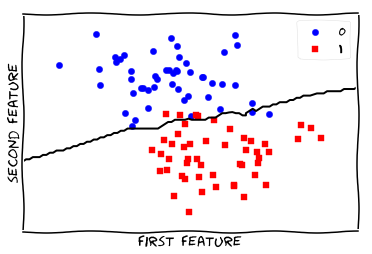

In [17]:
from figures import plot_2d_separator
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
_ = plt.legend()

### Visualize Model - scaled

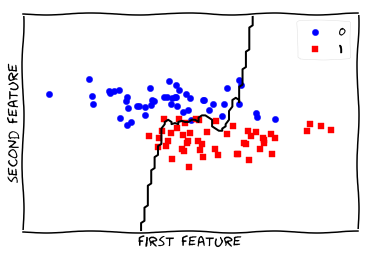

In [18]:
from figures import plot_2d_separator
plt.scatter(scaled_X[scaled_y == 0, 0], scaled_X[scaled_y == 0, 1], c='blue', s=40, label='0')
plt.scatter(scaled_X[scaled_y == 1, 0], scaled_X[scaled_y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(scaled_knn, scaled_X)
_ = plt.legend()

### Revelation 

> ### Number of neighbors matters as well!

### Tunning # of Neighbors

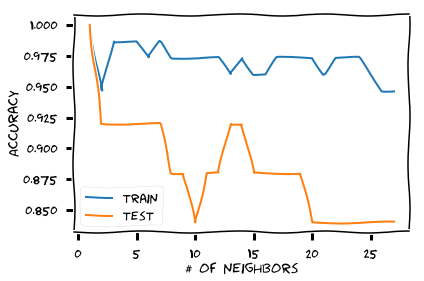

In [19]:
train_scores = []
test_scores = []
n_neighbors = range(1,28)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.plot(n_neighbors, train_scores, label='train')
plt.plot(n_neighbors, test_scores, label='test')
plt.ylabel('Accuracy')
plt.xlabel('# of neighbors')
plt.legend();plt.show()

> ### But Wait!! Is that Hyperparameter Tuning?

> # No

> ### Hyperparameter tuning is part of Model building and Test Data <span style="color:red">should not</span> be used in model build

> ### Hyperparameter Tuning should be performed using <span style="color:blue">Validation Set</span> - a subset of training set

In [20]:
import pandas as pd
# get columns with null - to return sorted in future
def null_pct(df):
    return {  k:sum(df[k].isnull())/len(df) for k in df.columns}
def null_count(df):
    return {  k:sum(df[k].isnull()) for k in df.columns}

In [21]:
from sklearn.base import TransformerMixin, BaseEstimator

class CategoricalTransformer(BaseEstimator, TransformerMixin):
    "Converts a set of columns in a DataFrame to categoricals"
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        'Records the categorical information'
        self.cat_map_ = {col: X[col].astype('category').cat
                         for col in self.columns}
        return self

    def transform(self, X, y=None):
        X = X.copy()
        for col in self.columns:
            X[col] = pd.Categorical(X[col],
            categories=self.cat_map_[col].categories,
            ordered=self.cat_map_[col].ordered)
        return X

    def inverse_transform(self, trn, y=None):
        trn = trn.copy()
        trn[self.columns] = trn[self.columns].apply(lambda x: x.astype(object))
        return trn
    
class DummyEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.columns_ = X.columns
        self.cat_cols_ = X.select_dtypes(include=['category']).columns
        self.non_cat_cols_ = X.columns.drop(self.cat_cols_)
        self.cat_map_ = {col: X[col].cat for col in self.cat_cols_}

        self.cat_blocks_ = {}  # {cat col: slice}
        left = len(self.non_cat_cols_)
        for col in self.cat_cols_:
            right = left + len(self.cat_map_[col].categories)
            self.cat_blocks_[col] = slice(left, right)
            left = right
        return self

    def transform(self, X, y=None):
        return np.asarray(pd.get_dummies(X))

    def inverse_transform(self, trn, y=None):
        numeric = pd.DataFrame(trn[:, :len(self.non_cat_cols_)],
                               columns=self.non_cat_cols_)
        series = []
        for col, slice_ in self.cat_blocks_.items():
            codes = trn[:, slice_].argmax(1)
            cat = self.cat_map_[col]
            cat = pd.Categorical.from_codes(codes,
                                            cat.categories,
                                            cat.ordered)
            series.append(pd.Series(cat, name=col))
        return pd.concat([numeric] + series, axis='columns')[self.columns_]

### Real Life Example - Housing Data

In [22]:
data = pd.read_csv('new_train.csv')
data.columns = [ x.lower().replace('.','_') for x in data.columns]
data.head().T

,0,1,2,3,4
id,1,2,3,4,5
sale_type,MLS Listing,MLS Listing,MLS Listing,MLS Listing,MLS Listing
sold_date,NaN,NaN,NaN,NaN,NaN
property_type,Condo/Co-op,Single Family Residential,Single Family Residential,Single Family Residential,Single Family Residential
city,Kew Gardens,Anaheim,Howard Beach,Aliso Viejo,Orlando
state,NY,CA,NY,CA,FL
zip,11415,92807,11414,92656,32837
beds,0,7,3,4,3
baths,1,5.5,1.5,4.5,2
location,The Texas,91 - Sycamore Canyon,Howard Beach,AV - Aliso Viejo,Orlando


### Some Observations

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19318 entries, 0 to 19317
Data columns (total 25 columns):
id                            19318 non-null int64
sale_type                     19318 non-null object
sold_date                     0 non-null float64
property_type                 19318 non-null object
city                          19306 non-null object
state                         19318 non-null object
zip                           19271 non-null object
beds                          18216 non-null float64
baths                         18053 non-null float64
location                      18773 non-null object
square_feet                   15693 non-null float64
lot_size                      10267 non-null float64
year_built                    16950 non-null float64
days_on_market                18328 non-null float64
x__square_feet                15693 non-null float64
hoa_month                     7553 non-null float64
status                        19318 non-null object
next

### What's different?

- Not all features are numeric - **Categorical Variables **
- Lot of missing data points

### More Revalations:
> ### scikit-learn models need data to be numeric/float
> ### scikit-learn models implicitly cannot handle missing values

### Final Revelation

> ### Any transformation applied on the training set to handle first 3 revelations should later be applied on the test set as well

In [24]:
del(data['sold_date'])
del(data['next_open_house_start_time'])
del(data['next_open_house_end_time'])

## Summary so far

We need to string following steps into a managable fashion to build <span style="color:red">effective</span> models

- Handle missing data
- Handle different scales across features
- Handle categorical data

### - Pipelines

#### But then also tune the model

- split training data into (cross)validation sets
- search best values for hyperparameters for optimal model performance

### - GridSearch

### More on Pipelines and GridSearchCV

- also known as meta-estimators in scikit-learn
- they inherit the properties of the last estimator used
- pipeline is used to chain multiple estimator into one pipe so output of one flows as input of next
- GridSearchCV is used to search on a hyperparameter grid the model with the best score 

### Making ML Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
make_pipeline( CategoricalTransformer(columns=cat_cols), DummyClassifier("most_frequent"))

This will inherit the properties of DummyClassifier

![pipeline](figures/pipeline.png)

Image Source: <a href="https://github.com/amueller/scipy-2017-sklearn/">SciPy 2016 Scikit-learn Tutorial</a>

> ## Back to real life housing classification problem

### Which features have less than 20% missing values?

In [25]:
d = pd.DataFrame(null_pct(data), index=['null_pct']).T.sort_values('null_pct')
d[(d.null_pct< .2 )]

,null_pct
id,0.000000
latitude,0.000000
interested,0.000000
favorite,0.000000
source,0.000000
status,0.000000
longitude,0.000000
target,0.000000
state,0.000000
property_type,0.000000


### Set features to work with

In [26]:
new_features = ['id', 'favorite', 'interested', 'latitude', 'longitude', 'status', 'property_type', 'sale_type', 'source', 
                'state', 'beds', 'baths', 'year_built', 'x__square_feet', 'square_feet', 'target']

sub_data = data[new_features]
sub_data.head(3)

,id,favorite,interested,latitude,longitude,status,property_type,sale_type,source,state,beds,baths,year_built,x__square_feet,square_feet,target
0,1,N,Y,40.7,-73.8,Active,Condo/Co-op,MLS Listing,MLSLI,NY,0.0,1.0,1956.0,NaN,NaN,False
1,2,N,Y,33.8,-117.8,Active,Single Family Residential,MLS Listing,CRMLS,CA,7.0,5.5,2000.0,514.0,7400.0,True
2,3,N,Y,40.7,-73.8,Active,Single Family Residential,MLS Listing,MLSLI,NY,3.0,1.5,1950.0,NaN,NaN,True


In [27]:
print (len(sub_data))
sub_data = sub_data.drop_duplicates(subset=['favorite', 'interested', 'latitude', 'longitude', 'status', 'property_type', 'sale_type', 
                                            'source', 'state', 'beds', 'baths', 'year_built', 'x__square_feet', 'square_feet', 'target'])
print (len(sub_data))

19318
17815


In [28]:
sub_data = sub_data.copy()
sub_data.loc[sub_data['sale_type'] == 'New Construction Plan','year_built'] = 2018.0
sub_data.loc[sub_data['property_type'] == 'Vacant Land','year_built'] = 2019.0

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Imputer, RobustScaler, StandardScaler

In [30]:
def plot_roc(model, X_test, y_test):
    df = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, df)
    acc = model.score(X_test, y_test)
    auc0 = roc_auc_score(y_test, df)
    auc1 = roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr, tpr, label="acc:%.2f auc0:%.2f auc1:%.2f" % (acc, auc0, auc1), linewidth=3)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    plt.title(repr(model).split('(')[0])
    plt.legend(loc="best");

In [31]:
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)

### Set model Inputs

In [32]:
X = sub_data[['favorite', 'interested', 'latitude', 'longitude', 'status', 'property_type', 'sale_type', 
                    'source', 'state', 'beds', 'baths', 'year_built', 'x__square_feet', 'square_feet']]
y = sub_data.target

In [33]:
cat_cols = ['favorite', 'interested', 'status', 'property_type', 'sale_type', 'source', 'state']

### Establish base case for prediction

In [34]:
dummy_pipe = make_pipeline( CategoricalTransformer(columns=cat_cols), DummyEncoder(), DummyClassifier("most_frequent"))
cross_val_score(dummy_pipe, X, y)

array([ 0.68984678,  0.68996295,  0.68996295])

### Create training and test set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42 )

### Support Vector Machine

In [36]:
Cs = [ 1, 10, 100, 500, 750] 
gammas = [0.0005, 0.001, 0.01, .1, 1] 
param_grid = {'svc__C': Cs, 'svc__gamma' : gammas}

In [37]:
svc_pipe = make_pipeline( CategoricalTransformer(columns=cat_cols), DummyEncoder(), Imputer(strategy='median'),  StandardScaler(), SVC(random_state=42) )

In [38]:
svmgrid = GridSearchCV(svc_pipe, param_grid, cv=5, n_jobs=-1, verbose=3)#, scoring=roc_auc_scorer)
svmgrid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV]  svc__C=1, svc__gamma=0.001, score=0.8323980546202768, total=  18.0s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV]  svc__C=1, svc__gamma=0.0005, score=0.7875046763935653, total=  19.0s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV]  svc__C=1, svc__gamma=0.001, score=0.7639356528245417, total=  19.5s
[CV] 

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   59.1s


[CV] svc__C=1, svc__gamma=1 ..........................................
[CV]  svc__C=1, svc__gamma=0.1, score=0.8843995510662177, total=  13.9s
[CV] svc__C=1, svc__gamma=1 ..........................................
[CV] . svc__C=1, svc__gamma=1, score=0.9042274597830153, total=  15.0s
[CV] svc__C=10, svc__gamma=0.0005 ....................................
[CV]  svc__C=1, svc__gamma=0.1, score=0.847997004867091, total=  15.0s
[CV] svc__C=10, svc__gamma=0.0005 ....................................
[CV]  svc__C=1, svc__gamma=0.1, score=0.8510479041916168, total=  15.8s
[CV] svc__C=10, svc__gamma=0.0005 ....................................
[CV]  svc__C=1, svc__gamma=0.1, score=0.8401946107784432, total=  15.7s
[CV] svc__C=10, svc__gamma=0.0005 ....................................
[CV] . svc__C=1, svc__gamma=1, score=0.8514777403666293, total=  16.5s
[CV] svc__C=10, svc__gamma=0.0005 ....................................
[CV] . svc__C=1, svc__gamma=1, score=0.8589071856287425, total=  15.5s
[CV

[CV] svc__C=500, svc__gamma=0.001 ....................................
[CV]  svc__C=100, svc__gamma=1, score=0.905314371257485, total=  13.1s
[CV] svc__C=500, svc__gamma=0.001 ....................................
[CV]  svc__C=100, svc__gamma=1, score=0.8989142643204793, total=  12.8s
[CV] svc__C=500, svc__gamma=0.001 ....................................
[CV]  svc__C=500, svc__gamma=0.0005, score=0.9225589225589226, total=  10.0s
[CV] svc__C=500, svc__gamma=0.001 ....................................
[CV]  svc__C=500, svc__gamma=0.0005, score=0.8649457538346427, total=  14.4s
[CV] svc__C=500, svc__gamma=0.001 ....................................
[CV]  svc__C=500, svc__gamma=0.0005, score=0.874625748502994, total=  14.2s
[CV] svc__C=500, svc__gamma=0.01 .....................................
[CV]  svc__C=500, svc__gamma=0.001, score=0.9270482603815937, total=  10.1s
[CV] svc__C=500, svc__gamma=0.01 .....................................
[CV]  svc__C=500, svc__gamma=0.0005, score=0.870883233

[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('categoricaltransformer', CategoricalTransformer(columns=['favorite', 'interested', 'status', 'property_type', 'sale_type', 'source', 'state'])), ('dummyencoder', DummyEncoder()), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardscaler', ...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svc__C': [1, 10, 100, 500, 750], 'svc__gamma': [0.0005, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [39]:
roc_auc_score(y_test, svmgrid.predict(X_test))

0.90180396517871109

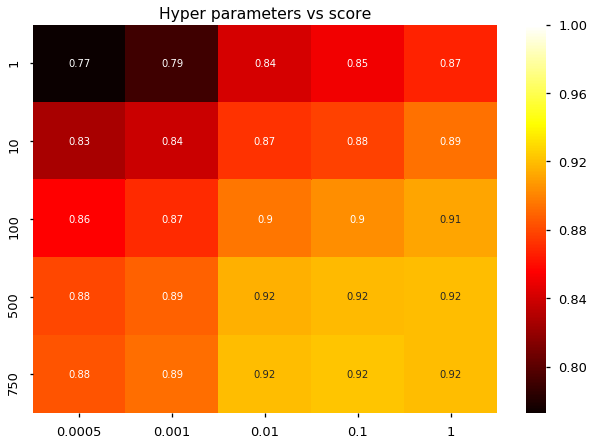

In [40]:
scores = svmgrid.cv_results_['mean_test_score'].reshape(5,5)
sns.heatmap(scores, vmax=1, xticklabels=param_grid['svc__gamma'], yticklabels=param_grid['svc__C'], cmap='hot', annot=True)
plt.title('Hyper parameters vs score')
plt.show()

Text(0.5,1,'SVM')

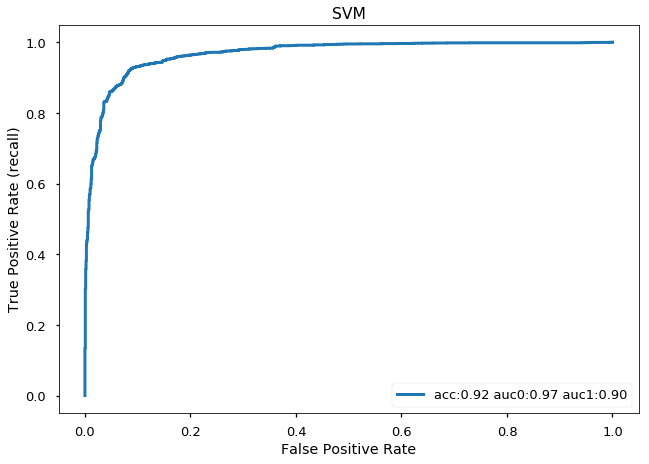

In [41]:
plot_roc(svmgrid, X_test, y_test)
plt.title('SVM')

### Adaboost

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
n_estimators = [ 1500, 1570, 2000, 2250, 3000, 3250, 3500]
param_grid = {'adaboostclassifier__n_estimators': n_estimators}

In [44]:
abpipe = make_pipeline(CategoricalTransformer(columns=cat_cols), DummyEncoder(), Imputer(strategy='median'), StandardScaler(), 
                   AdaBoostClassifier())

In [45]:
abgrid = GridSearchCV(abpipe, param_grid, cv=5, n_jobs=-1, verbose=3, scoring=roc_auc_scorer)
abgrid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] adaboostclassifier__n_estimators=1500 ...........................
[CV] adaboostclassifier__n_estimators=1500 ...........................
[CV] adaboostclassifier__n_estimators=1500 ...........................
[CV] adaboostclassifier__n_estimators=1500 ...........................
[CV] adaboostclassifier__n_estimators=1500 ...........................
[CV] adaboostclassifier__n_estimators=1570 ...........................
[CV] adaboostclassifier__n_estimators=1570 ...........................
[CV] adaboostclassifier__n_estimators=1570 ...........................
[CV]  adaboostclassifier__n_estimators=1500, score=0.9974806405731442, total=  19.8s
[CV] adaboostclassifier__n_estimators=1570 ...........................
[CV]  adaboostclassifier__n_estimators=1500, score=0.996398639757171, total=  19.9s
[CV] adaboostclassifier__n_estimators=1570 ...........................
[CV]  adaboostclassifier__n_estimators=1500, score=0.99703282

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.0min


[CV]  adaboostclassifier__n_estimators=2250, score=0.9971371408263462, total=  32.3s
[CV] adaboostclassifier__n_estimators=3000 ...........................
[CV]  adaboostclassifier__n_estimators=2250, score=0.9975270636885634, total=  32.6s
[CV] adaboostclassifier__n_estimators=3250 ...........................
[CV]  adaboostclassifier__n_estimators=2250, score=0.9959233261339093, total=  33.4s
[CV] adaboostclassifier__n_estimators=3250 ...........................
[CV]  adaboostclassifier__n_estimators=2250, score=0.9962773307805706, total=  33.3s
[CV] adaboostclassifier__n_estimators=3250 ...........................
[CV]  adaboostclassifier__n_estimators=3000, score=0.9971509615258052, total=  43.3s
[CV] adaboostclassifier__n_estimators=3250 ...........................
[CV]  adaboostclassifier__n_estimators=3000, score=0.9966264330749082, total=  44.3s
[CV] adaboostclassifier__n_estimators=3250 ...........................
[CV]  adaboostclassifier__n_estimators=3000, score=0.99753134383

[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:  2.8min remaining:   16.0s


[CV]  adaboostclassifier__n_estimators=3500, score=0.9975040167518305, total=  41.5s
[CV]  adaboostclassifier__n_estimators=3500, score=0.9959628351683085, total=  39.6s
[CV]  adaboostclassifier__n_estimators=3500, score=0.9962746936289053, total=  36.2s


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('categoricaltransformer', CategoricalTransformer(columns=['favorite', 'interested', 'status', 'property_type', 'sale_type', 'source', 'state'])), ('dummyencoder', DummyEncoder()), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardscaler', ...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'adaboostclassifier__n_estimators': [1500, 1570, 2000, 2250, 3000, 3250, 3500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score, needs_threshold=True), verbose=3)

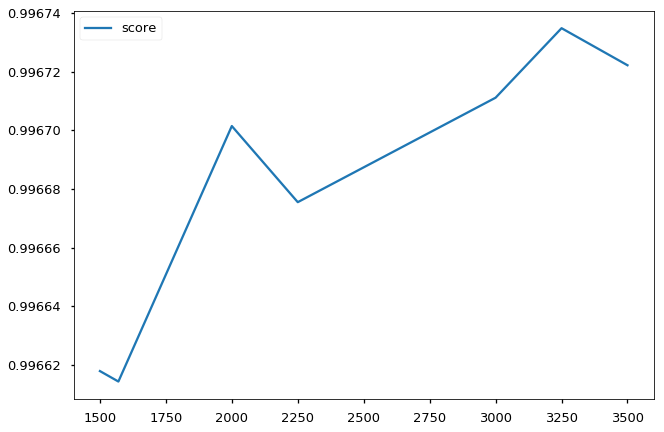

In [46]:
pd.DataFrame({'score':abgrid.cv_results_['mean_test_score']}, index=abgrid.cv_results_['param_adaboostclassifier__n_estimators']).plot()

In [47]:
roc_auc_score(y_test, abgrid.predict(X_test))

0.96757739512200769

In [48]:
abgrid.best_estimator_, abgrid.best_params_

(Pipeline(memory=None,
      steps=[('categoricaltransformer', CategoricalTransformer(columns=['favorite', 'interested', 'status', 'property_type', 'sale_type', 'source', 'state'])), ('dummyencoder', DummyEncoder()), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardscaler', ...'SAMME.R', base_estimator=None,
           learning_rate=1.0, n_estimators=3250, random_state=None))]),
 {'adaboostclassifier__n_estimators': 3250})

## Thank you!